# Ensembling - recap
* Combining several models in a some way usually results in better quality.
* The most common ways are stacking, bagging and boosting.
* Stacking is how deep learning works - by using the output of one model as features to another.
* Stacking is a common thing in competitive data science, where it allows to get that 0.0001% of quality. A common technique of averaging predictions of different models is stacking with a linear model.
* Boosted decision trees have comparable quality with deep learning on tabular data. In general, there is a trend that the smaller the datasets, the worse a fully-connected MLP perform compared to gradient boosting. Tabular data is structured data. GBMs don't work very well with unstructured data such as sequential data or pixels in an image. You can treat any dataset as tabular, but almost certainly ignoring the structure will lead to worse performance.

# Something you'll actually use: Gradient Boosting machines

We look for an algorithm that optimizes some differentiable loss function $L(y,z)$, in the form of a weighted sum of the basic algorithms:

$$ a_N(x) = \sum_{n = 0}^{N} \gamma_n b_n(x). $$

The idea of boosting is the sequential training of algorithms, each of which takes into account the errors of the composition built so far:

$$\sum_{i = 1}^{\ell} L(y_i, a_{N - 1}(x_i) + \gamma_N b_N(x_i)) \to \min_{b_N, \gamma_N} $$


After selecting some $\gamma_0$ and $b_0(x)$ (for example, for the regression problem one can use $\gamma_0 = 1$ and $b_0(x) = \frac 1\ell \sum_{i=1}^\ell y_i$)

all the following basic algorithms try to approximate the anti-gradient of the loss function, taken at point $z = a_{N - 1}(x_i)$:

$$  s_i
    =
    -
    \left.
    \frac{\partial L(y_i, z)}{\partial z}
    \right|_{z = a_{N - 1}(x_i)}
$$

In this case, the antigradient is approximated using the quadratic loss function:
$$
b_N(x)=argmin_{b \in A} \sum_{i = 1}^{\ell} \left(b(x_i) - s_i\right)^2
$$

The coefficients are selected through the one-dimensional optimization problem:
$$
\gamma_N=argmin_{\gamma \in \mathbb{R}} \sum_{i=1}^{\ell}L(y_i, a_{N-1}(x_i) + \gamma b_N (x_i))
$$


Regularization

Instead of moving to the optimal point in the direction of the anti-gradient, a shortened step is taken:
        $$ a_N(x) = a_{N - 1}(x) + \eta\gamma_N b_N(x)$$

where $\eta \in (0, 1]$ - learning rate.

As a rule, the lower the learning rate, the better the quality of the final composition.

# GB visualizations

[Visualization](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) of gradient boosting for decision trees of different depths for functions of different types.

## Why is gradient boosting designed this way?

#### Task: Why are the shifts in boosting calculated through derivatives of the loss function?

We have a regression problem. Let's say we have an asymmetric loss function, that penalizes overestimating the forecast more than underestimating it: 
        $$ L(y, z) = \frac{1}{2} (10 [z \geq y] + [z < y])(y - z)^2.$$
        
Consider two objects $x_1$ and $x_2$ with targets $y_1=y_2=0$ and predictions of the current composition $a_{N - 1}(x_1) = 5$ and $a_{N - 1}(x_2) = -5$.

Shifts calculated as partial derivates are the following: $s_1 = -50, s_2 = 5$

1. Calculate loss function on this objects.
2. Calculate shifts equal to $y_i - a_{N - 1}(x_i)$ for this object and compare them with shifts $s_i$.

# Bagging vs. Boosting

Let's compare how boosting and bagging behave with the increase of the number of basic algorithms.

In the case of **bagging**, all the basic algorithms are configured for different samples from the same distribution on $\mathbb{X}\times\mathbb{Y}$. Though some of them may be overfitted, averaging them allows to weaken this effect (due to the fact that for uncorrelated algorithms, the variance of the composition turns out to be $N$ times less than the variance of individual algorithms, i.e. many trees are less likely to overfit to some anomalous object compared to one tree). If $N$ is large enough, then subsequent additions of new algorithms will no longer improve the quality of the model.

In the case of **boosting**, each algorithm adjusts to the errors of all previous ones, this allows you to adjust to the initial distribution more and more accurately at each step. However, with a sufficiently large $N$, it becomes much easier to overfit, since subsequent additions of new algorithms will continue to adjust the training sample, reducing the error on it, while decreasing the generalizing ability of the final composition.

In [6]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

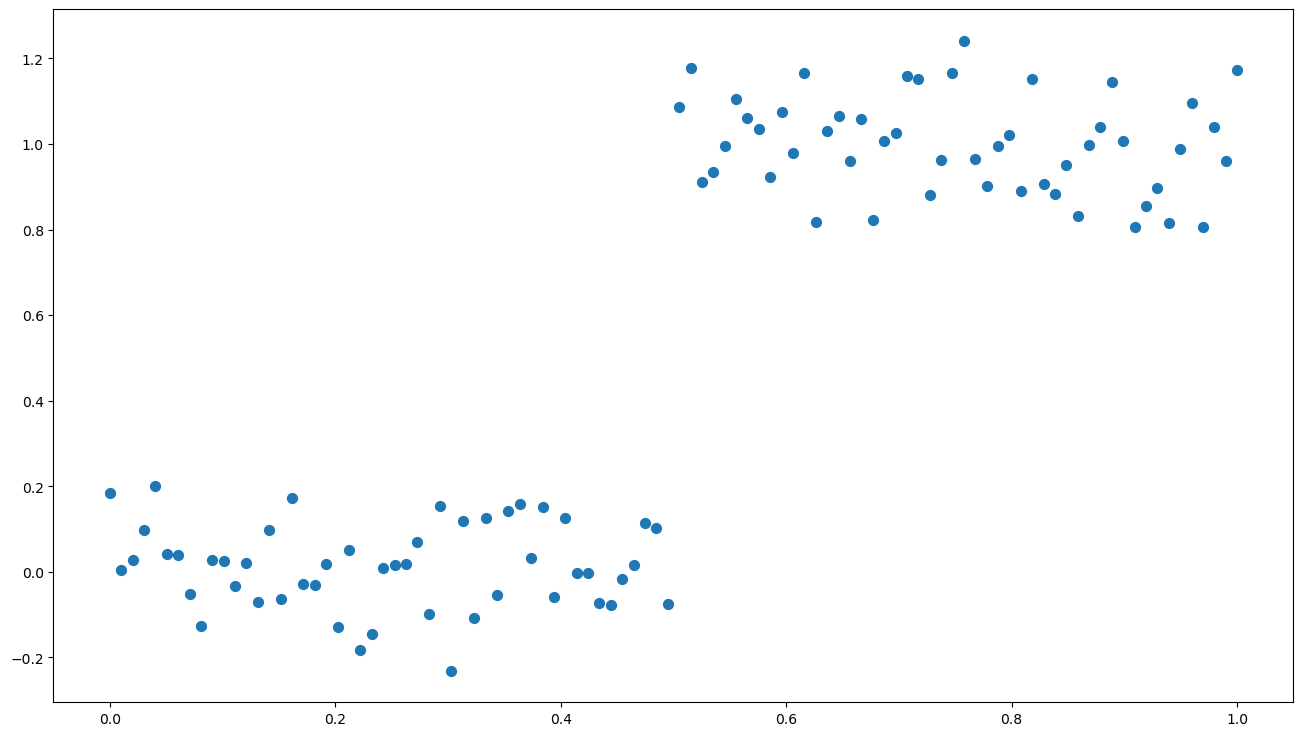

In [8]:
X_train = np.linspace(0, 1, 100)
X_train = X_train.reshape(-1, 1)
X_test = np.linspace(0, 1, 1000)
X_test = X_test.reshape(-1, 1)

@np.vectorize
def target(x):
    return x > 0.5

Y_train = target(X_train) + np.random.randn(*X_train.shape) * 0.1

plt.figure(figsize = (16, 9))
plt.scatter(X_train, Y_train, s=50);

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

In [ ]:
BaggingRegressor()

## Bagging

#### Task: train Bagging regressor with Decision tree (max_depth=2) as a base algorithm.
Train Bagging regressor with different number of trees: [1, 2, 5, 20, 100, 500, 1000, 2000]

`Hint`: you can use GradientBoostingRegressor() with warm_start=True

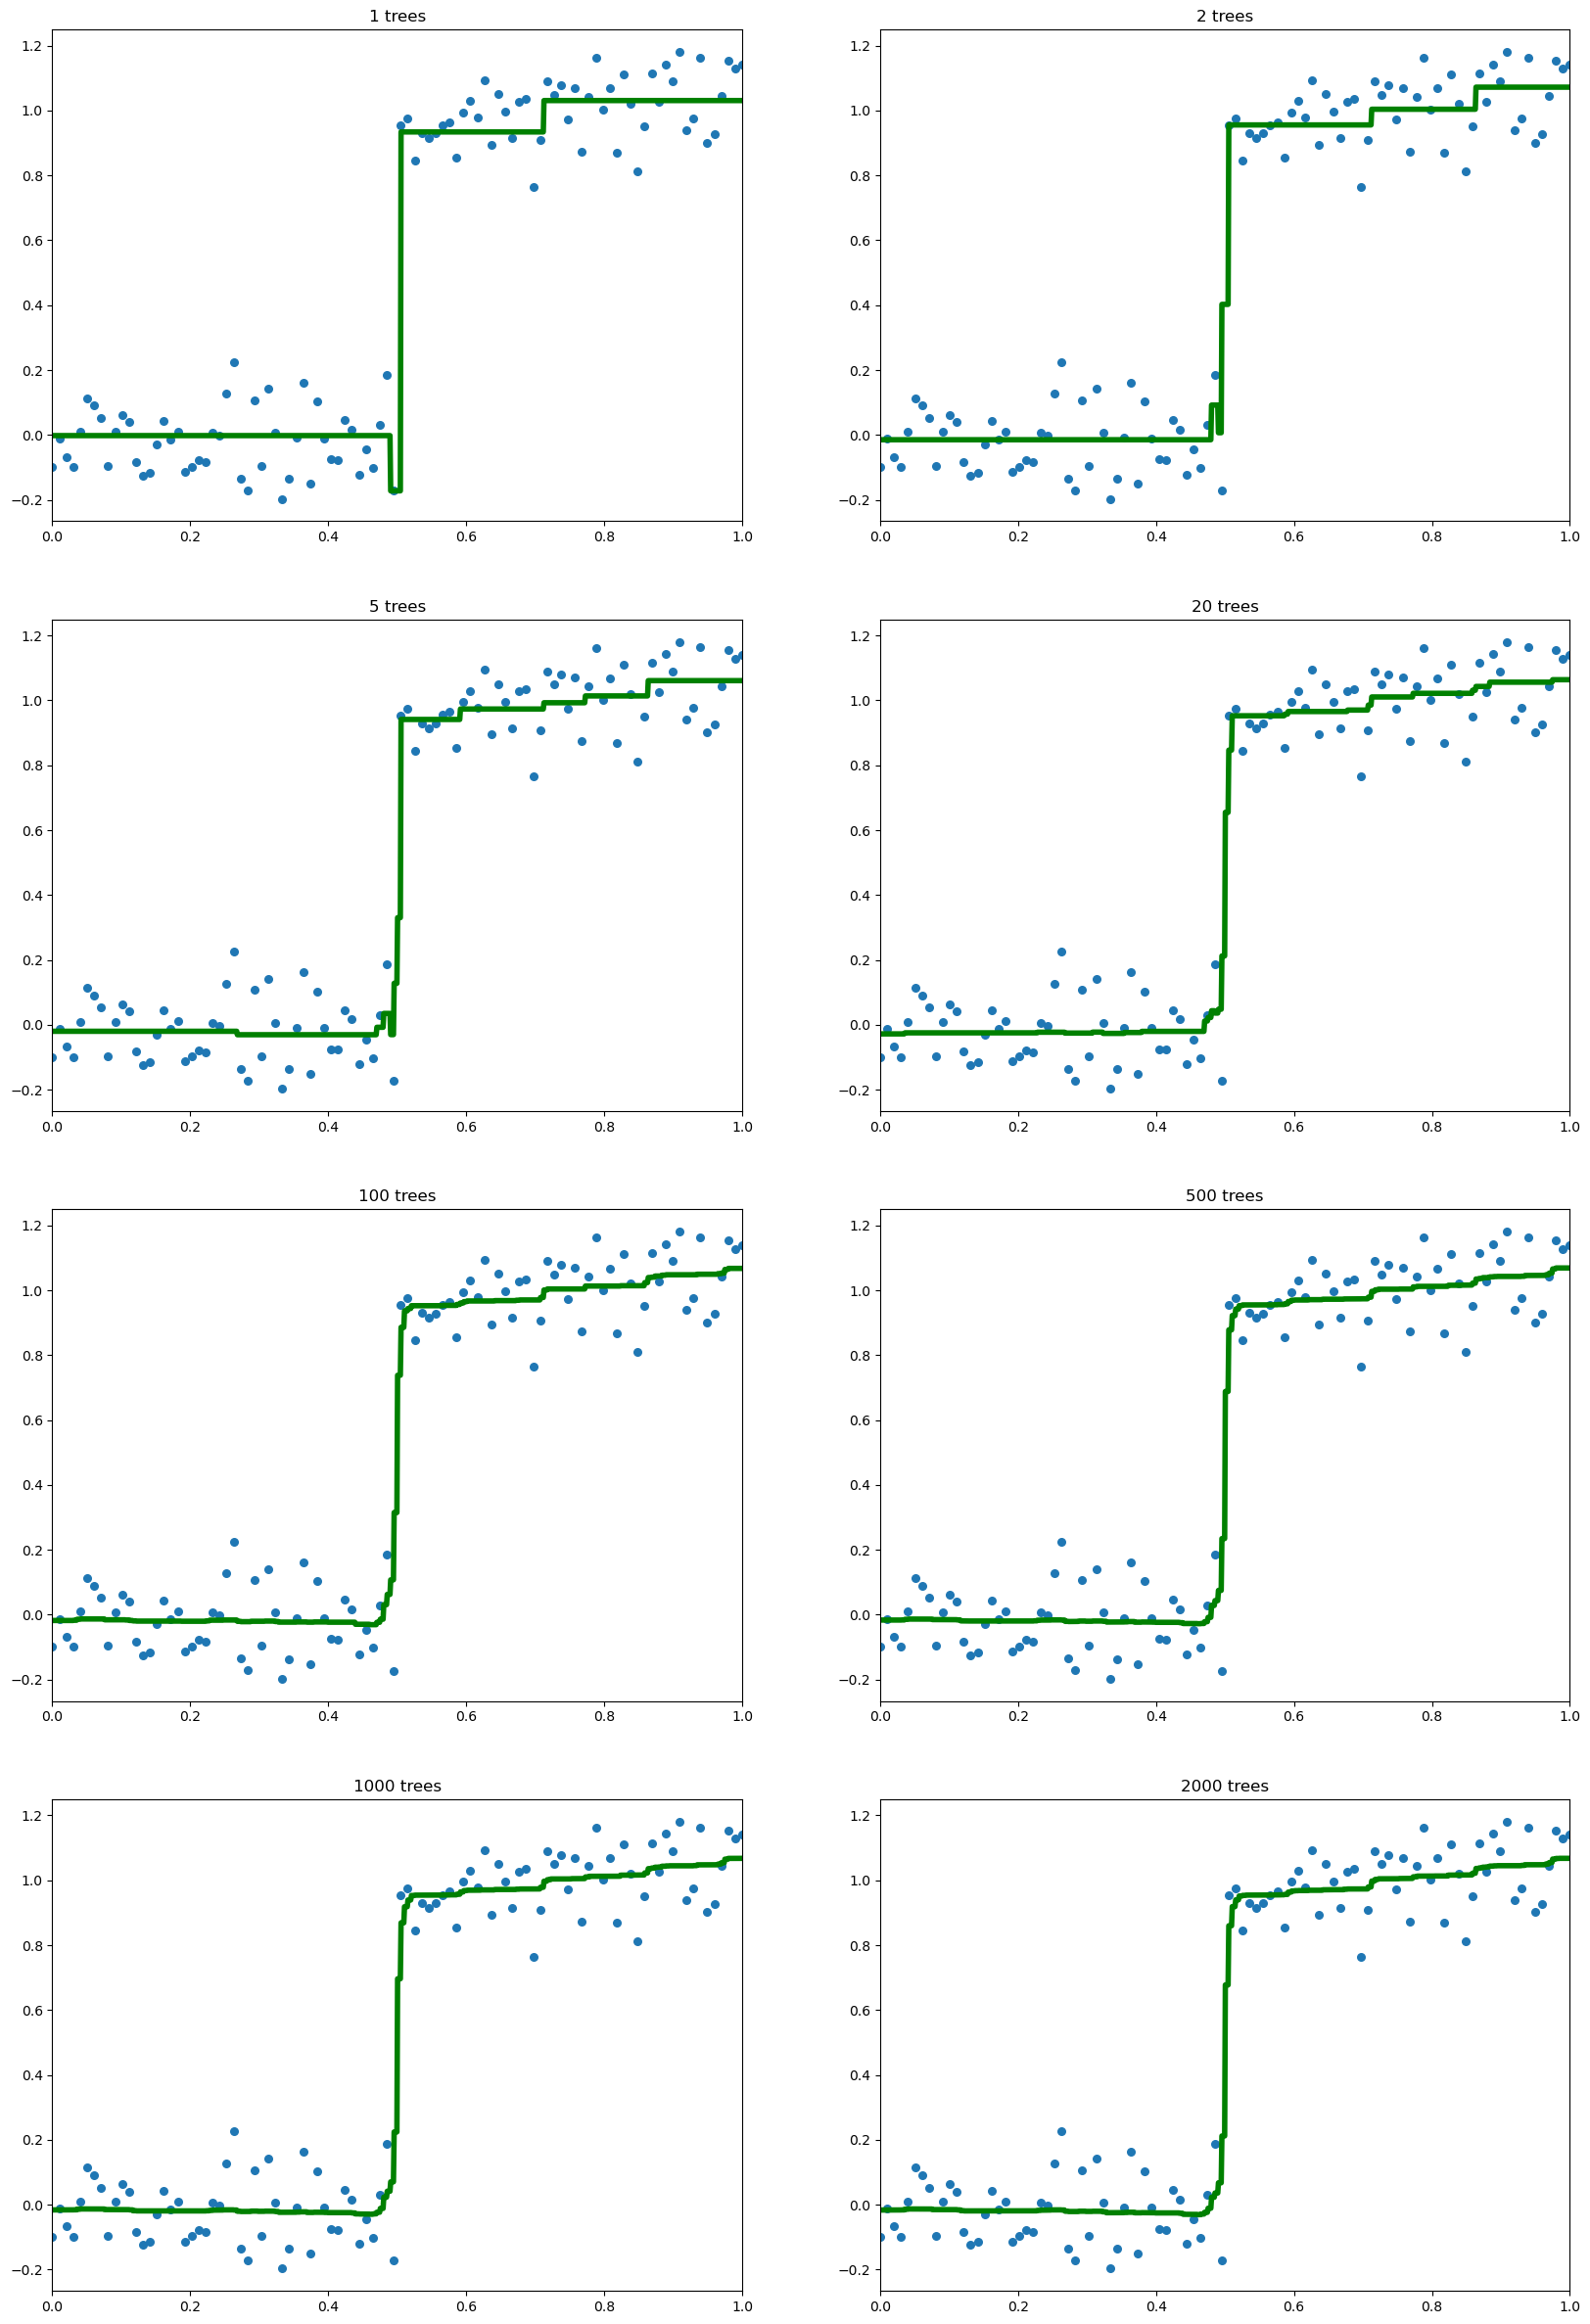

In [4]:
reg = ...

plt.figure(figsize=(20, 30))

num_trees = [1, 2, 5, 20, 100, 500, 1000, 2000]
for i, s in enumerate(num_trees):
    ...
    test_pred = ...
    
    plt.subplot(4, 2, i+1)
    plt.xlim([0, 1])
    plt.scatter(X_train, Y_train, s=30)
    plt.plot(X_test, test_pred, c='green', linewidth=4)
    plt.title('{} trees'.format(s))

#### Task: how does the final function change with the growth of the number of trees?

## Boosting

#### Task: let's do the same for gradient boosting. Train GB regressor with different number of trees (max_depth=1 and learning_rate=1).
Number of trees = [1, 2, 5, 20, 100, 500, 1000, 2000]

`Hint`: you can use GradientBoostingRegressor() with warm_start=True

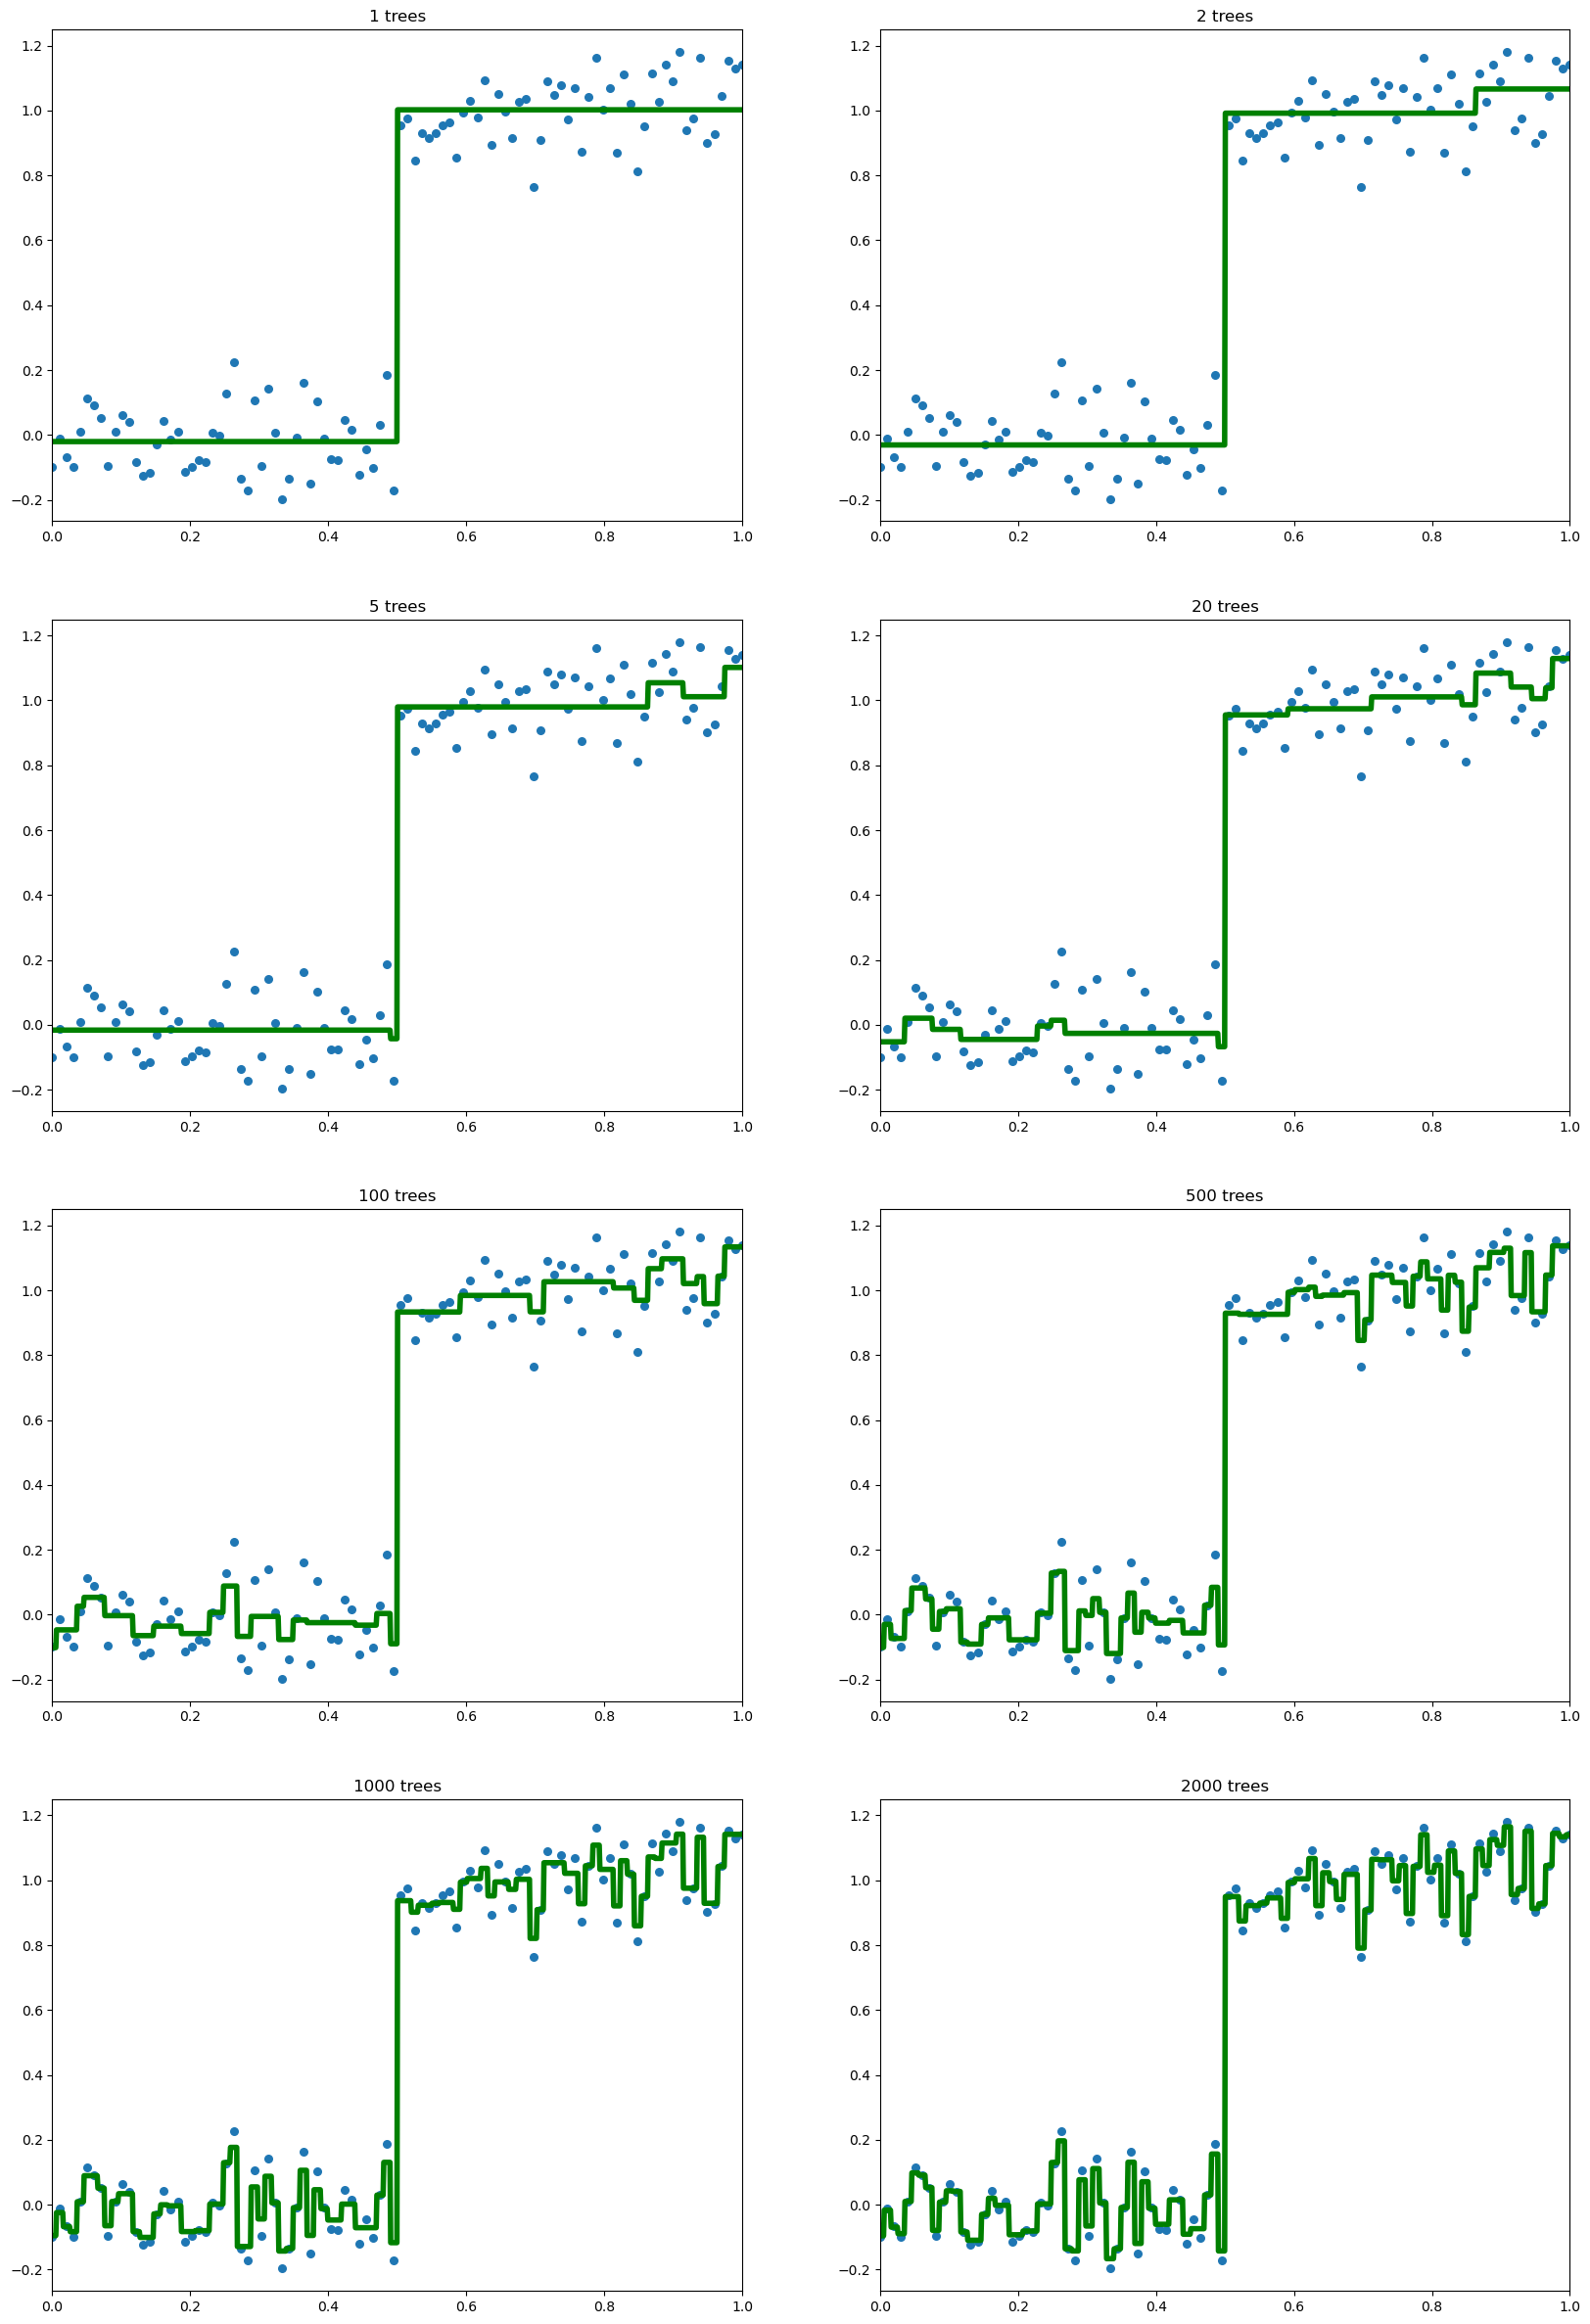

In [5]:
reg = ...

plt.figure(figsize=(20, 30))

num_trees = [1, 2, 5, 20, 100, 500, 1000, 2000]
for i, s in enumerate(num_trees):
    ... 
    test_pred = ...
    
    plt.subplot(4, 2, i+1)
    plt.xlim([0, 1])
    plt.scatter(X_train, Y_train, s=30)
    plt.plot(X_test, test_pred, c='green', linewidth=4)
    plt.title('{} trees'.format(s))

Gradient boosting quickly found the true dependence, after which it began to adjust to individual objects of the training sample, that is why it's overfitted.

You can overcome this problem by choosing a very simple basic algorithm or by artificially reducing the weight of new algorithms using the step $\eta$: $$a_N(x) = \sum_{n=0}^N \eta \gamma_N b_n(x).$$

It slows down learning process compared to bagging, but it allows you to get a less overfitted algorithm. Nonetheless, overfitting will still take place when training an arbitrarily large number of basic algorithms for a fixed learning rate $\eta$.

#### Task: Train GB regressor with different number of trees (max_depth=1), but this time use learning rate during training.
Again number of trees = [1, 2, 5, 20, 100, 500, 1000, 2000]

`Hint`: you can use GradientBoostingRegressor() with warm_start=True

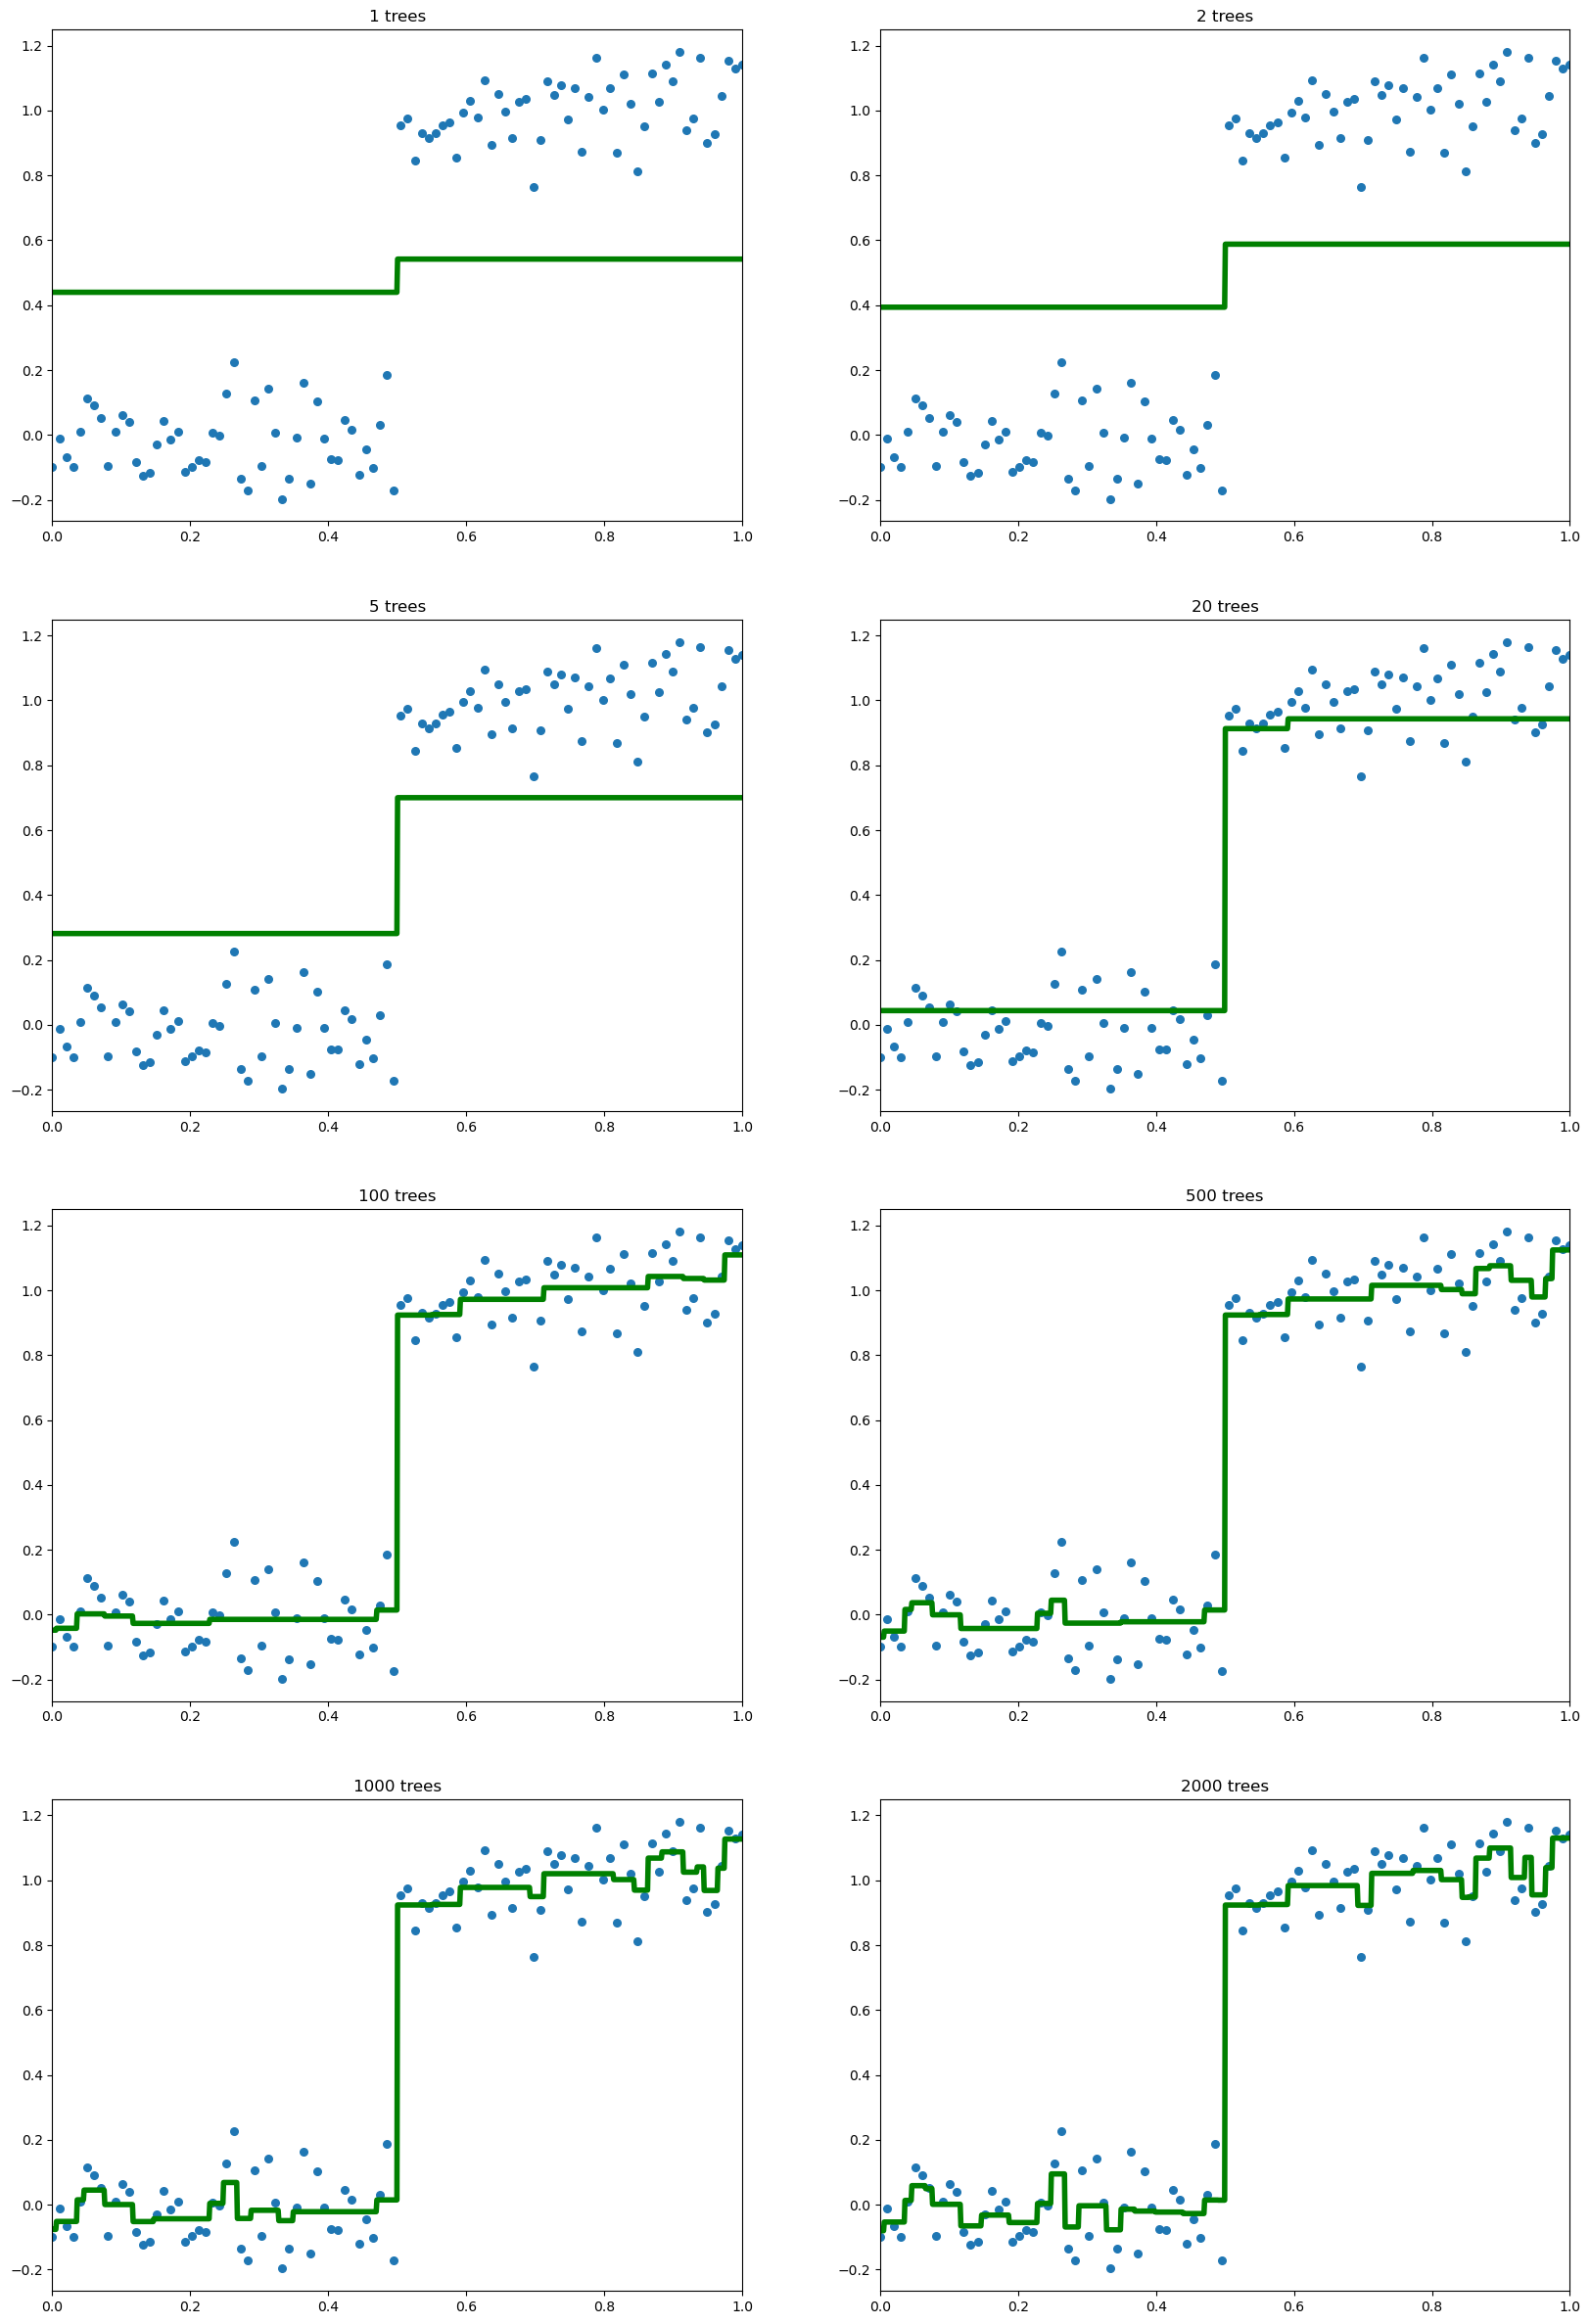

In [6]:
reg = ...

plt.figure(figsize=(20, 30))
num_trees = [1, 2, 5, 20, 100, 500, 1000, 2000]
for i, s in enumerate(num_trees):
    ...
    test_pred = ...
    
    plt.subplot(4, 2, i+1)
    plt.xlim([0, 1])
    plt.scatter(X_train, Y_train, s=30)
    plt.plot(X_test, test_pred, c='green', linewidth=4)
    plt.title('{} trees'.format(s))

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

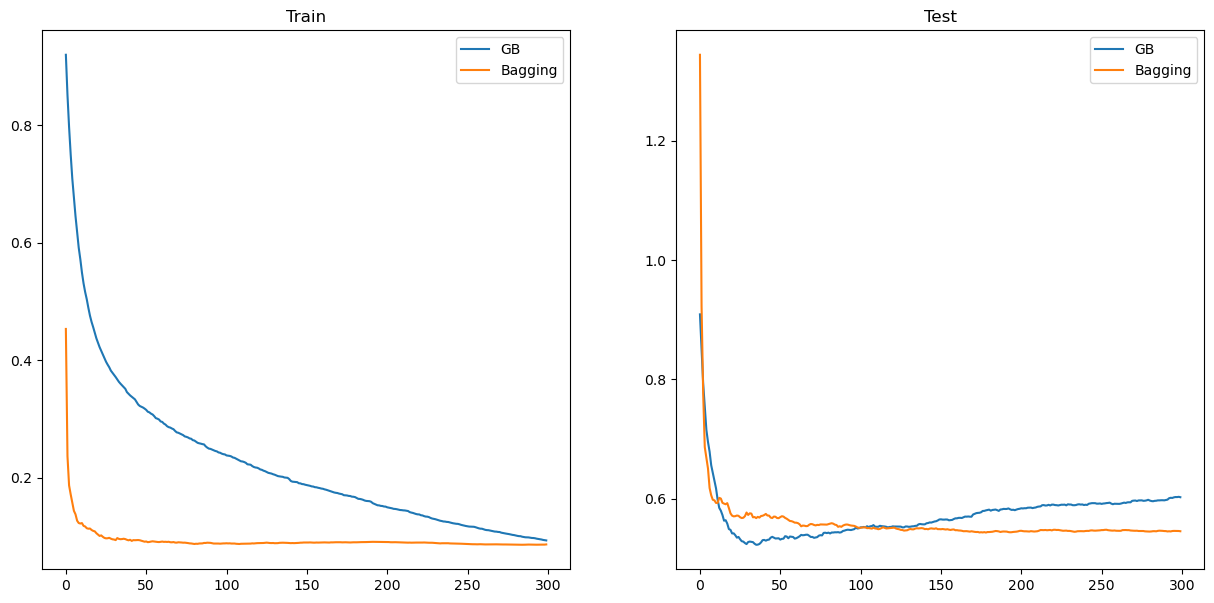

In [6]:
ds = datasets.load_diabetes()
X = ds.data
Y = ds.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, test_size=0.5)

MAX_ESTIMATORS = 300

bag = BaggingRegressor(warm_start=True)
err_train_bag = []
err_test_bag = []
for i in range(1, MAX_ESTIMATORS+1):
    bag.n_estimators = i
    bag.fit(X_train, Y_train)
    err_train_bag.append(1 - bag.score(X_train, Y_train))
    err_test_bag.append(1 - bag.score(X_test, Y_test))
    
gb = GradientBoostingRegressor(warm_start=True, max_depth=2, learning_rate=0.1)
err_train_gb = []
err_test_gb = []
for i in range(1, MAX_ESTIMATORS+1):
    gb.n_estimators = i
    gb.fit(X_train, Y_train)
    err_train_gb.append(1 - gb.score(X_train, Y_train))
    err_test_gb.append(1 - gb.score(X_test, Y_test))
    
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(err_train_gb, label='GB')
plt.plot(err_train_bag, label='Bagging')
plt.legend()
plt.title('Train')

plt.subplot(1, 2, 2)
plt.plot(err_test_gb, label='GB')
plt.plot(err_test_bag, label='Bagging')
plt.legend()
plt.title('Test')
plt.gcf().set_size_inches(15,7)

## Gradient boosting and Random Forest

[Kaggle: Predicting a Biological Response](https://www.kaggle.com/c/bioresponse)

In **random forests**, deep trees are used because in bagging low bias is required from the basic algorithms. The variance is reduced by averaging the responses of different trees. 

**Boosting** works differently: each subsequent algorithm reduces the error of ensemble, even with using simple basic models, their composition can be complex. Moreover, the final ensemble may be overfited with a large number of basic models. This means that boosting reduces bias and it either leaves the variance the same or increases it. Because of this, not very deep decision trees (3-6 levels) are often used in boosting (they usually have high bias).

In [8]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [21]:
data = pd.read_csv('train_sem09.csv')
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [10]:
%%time
gbm = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2, verbose=True).fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2613           12.76s
         2           1.1722           11.71s
         3           1.1009           11.20s
         4           1.0528           10.90s
         5           1.0129           10.75s
         6           0.9739           11.04s
         7           0.9473           11.40s
         8           0.9194           11.60s
         9           0.9008           11.60s
        10           0.8814           11.45s
        20           0.7201           10.52s
        30           0.5950           10.09s
        40           0.5214            9.70s
        50           0.4482            9.42s
        60           0.3862            8.88s
        70           0.3427            8.11s
        80           0.3014            7.50s
        90           0.2723            7.25s
       100           0.2390            6.83s
       200           0.0787            2.26s
CPU times: user 10.7 s, sys: 63.8 ms, total: 10.8 s
Wa

#### Task: compare quality of GB for different learning rates.
take following learning rates [1, 0.5, 0.3, 0.2, 0.1] 

number of trees is 150, random_state is 241

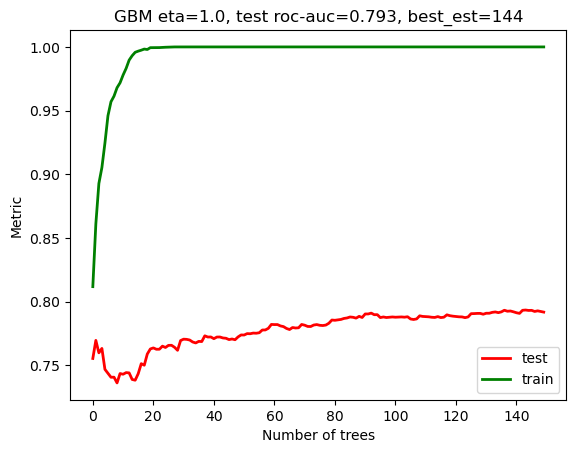

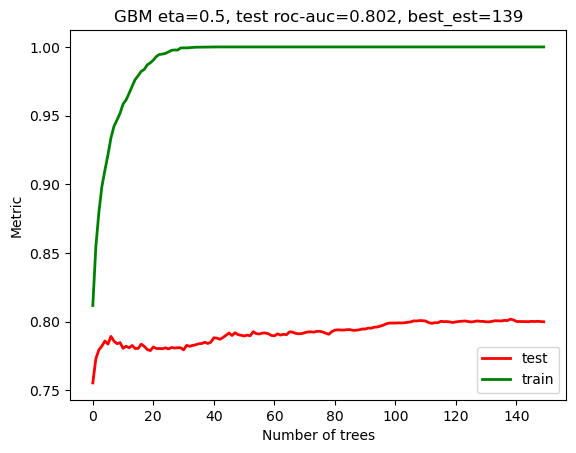

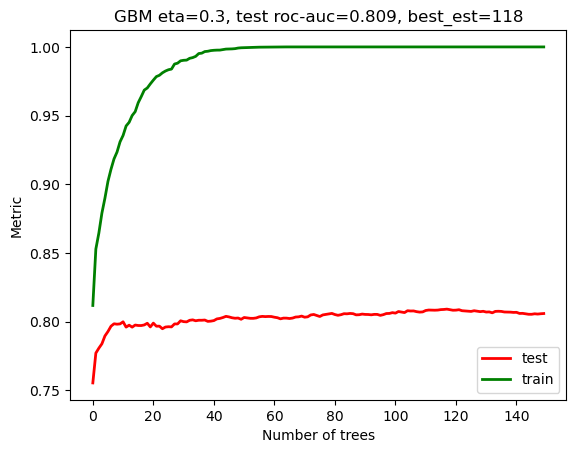

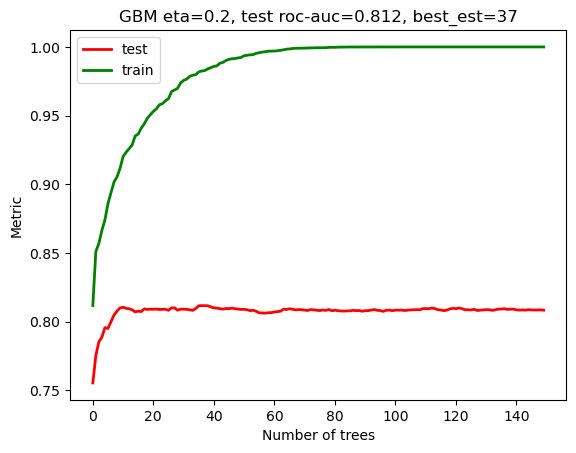

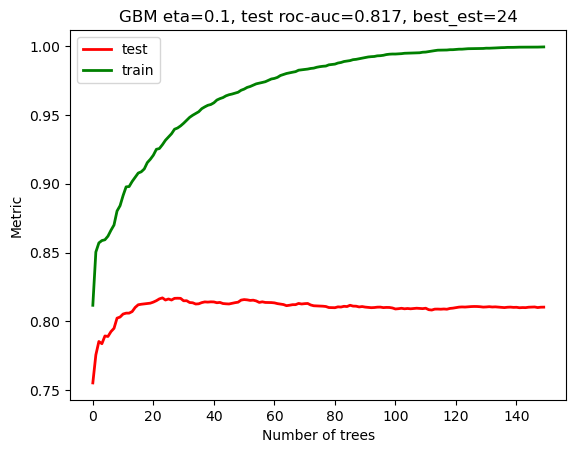

In [11]:
for ...

    gbm = ...

    test_score = np.zeros((gbm.n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(gbm.staged_decision_function(X_test)):
        y_pred = 1.0 / (1.0 + np.exp(-y_pred))
        test_score[i] = roc_auc_score(y_test, y_pred)
    
    train_score = np.zeros((gbm.n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(gbm.staged_decision_function(X_train)):
        y_pred = 1.0 / (1.0 + np.exp(-y_pred))
        train_score[i] = roc_auc_score(y_train, y_pred)

    plt.figure()
    plt.plot(test_score, 'r', linewidth=2)
    plt.plot(train_score, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    
    plt.title('GBM eta=%.1f, test roc-auc=%.3f, best_est=%d' % (learning_rate, test_score.max(), test_score.argmax()+1))
    plt.xlabel('Number of trees')
    plt.ylabel('Metric')

#### Task: what is the best composition for this data? What's the best learning rate and number of trees?



#### Task: let's see the quality of random forest with the same number of trees.

In [15]:
rf = ...

print ('Train RF ROC-AUC = {:.5f}'.format(roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])))
print ('Test RF ROC-AUC = {:.5f}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))

Train RF ROC-AUC = 0.99998
Test RF ROC-AUC = 0.80375


A random forest with the same number of trees is worse than gradient boosting. Note also that random forest, unlike gradient boosting, uses deep trees that require more computing capacity to train them.

#### Task: how many basic algorithms will a random forest need to achieve comparable quality?

In [16]:
for ...
    rf = ...
    print(n_estimators,
          'trees: train ROC-AUC = {:.5f}'.format(roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])),
                  'test ROC-AUC = {:.5f}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))

10 trees: train ROC-AUC = 0.99891 test ROC-AUC = 0.77911
20 trees: train ROC-AUC = 0.99995 test ROC-AUC = 0.79922
30 trees: train ROC-AUC = 1.00000 test ROC-AUC = 0.80759
40 trees: train ROC-AUC = 1.00000 test ROC-AUC = 0.81103
50 trees: train ROC-AUC = 1.00000 test ROC-AUC = 0.82119
60 trees: train ROC-AUC = 1.00000 test ROC-AUC = 0.81659
70 trees: train ROC-AUC = 1.00000 test ROC-AUC = 0.81457
80 trees: train ROC-AUC = 1.00000 test ROC-AUC = 0.82083
90 trees: train ROC-AUC = 1.00000 test ROC-AUC = 0.82006
100 trees: train ROC-AUC = 1.00000 test ROC-AUC = 0.82808


#### Task: which algorithm (boosting or bagging) learns faster?

# GB implementations

From the user point of view the competing toolkits are mostly the same. In each of them there is a clever engineering, smart algorithm enhancement and own heuristic tricks, but for common tasks the performance difference is small for practical purposes.

They all support **multithreading**, training on **GPU**,  have commited developer communities, **documentation**.

## XGBoost

* Is the oldest and the most known
* Multi-node Multi-GPU distributed training (parallelization at the tree level)
* Can [plot its trees](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.plotting)

#### Notable technical details [[paper](https://arxiv.org/pdf/1603.02754.pdf)]:
* Can use [DART: Dropouts meet Multiple Additive Regression Trees](http://proceedings.mlr.press/v38/korlakaivinayak15.pdf)
* Can use exact, approximate and histogram-based split search
* **Regularization**: It includes L1 (Lasso) and L2 (Ridge) regularization techniques to prevent overfitting, enhancing the model's ability to generalize well to unseen data.

    One decision tree could be described with the following formula: $b(x) = \sum_{j = 1}^{J} b_{j}[x \in R_{j}]$. 

    Its complexity depends on two indicators:
    * The number of leaves is $J$. 
    * The norm of coefficients in leaves is $\|b\|_2^2 = \sum_{j = 1}^{J} b_j^2$. The more the coefficients differ from zero, the stronger the given basic algorithm will influence the final answer of the ensemble.

    The final function in XGBoost: 
    $$ 
    \sum_{i = 1}^{\ell} \left(
        -
        s_i b(x_i)
        +
        \frac12
        h_i b^2(x_i)
    \right)
    +
    \gamma J
    +
    \frac{\lambda}{2}
    \sum_{j = 1}^{J}
        b_j^2
    \to
    \min_{b}
    $$ 
* Use the second derivative during training
* Special impurity criterion and stopping criteria that depend on the optimal shift $s_i$.

## Light GBM
* Fast and memory-efficitent training
* GPU training
* [Distributed training](https://github.com/microsoft/LightGBM/blob/master/docs/Parallel-Learning-Guide.rst)

#### Notable [technical details](https://github.com/microsoft/LightGBM/blob/master/docs/Features.rst) [[paper](https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree.pdf)]

 
* **Leaf-wise Tree Growth**: Unlike traditional level-wise tree growth, LightGBM grows trees leaf-wise, which allows it to select the leaf with the maximum reduction in loss. This approach can lead to deeper trees and better accuracy but may increase the risk of overfitting, particularly with smaller datasets.

* **Gradient-based One-Side Sampling (GOSS)**: This technique focuses on retaining data points with larger gradients while randomly dropping those with smaller gradients during training. GOSS enhances the efficiency of learning by prioritizing more informative data points.

* **Exclusive Feature Bundling (EFB)**: LightGBM identifies and combines mutually exclusive features into a single feature, effectively reducing dimensionality and speeding up the learning process without significant loss of information.

* Histogram-based Learning: algorithm buckets continuous feature values into discrete bins. This method accelerates training and reduces memory usage by simplifying the computation of gains for splits.

## CatBoost (Categorical Boosting)
* Built-in handling of categorial features
* Single-node Multi-GPU training
* Is fast to run the prediction (we use in LHCb trigger)
* [Fancy Jupyter training visualisation](https://catboost.ai/docs/features/visualization.html)

#### Notable technical details [[paper](https://arxiv.org/pdf/1706.09516.pdf)]:
* Uses **oblivious trees**. They are less flexible than the ordinary trees, but are a lot faster to evaluate

![oblivious trees](https://github.com/yandexdataschool/mlhep2019/raw/master/notebooks/day-2/oblivious_tree.webp)

* **Ordered boosting**: for calculating the residual on an example, uses a model trained without it. It calculates gradients on a subset of data while training on another, which reduces prediction bias.
* Uses histogram-based split selection

* Effective Handling of **Categorical Features**: CatBoost automatically processes categorical variables without the need for extensive preprocessing or manual encoding.

* Built-in Regularization: The algorithm incorporates L2 regularization to prevent overfitting by adding a penalty term to the loss function, improving the model's generalization capabilities.

In [2]:
import catboost
import xgboost
import lightgbm

print('CatBoost: ', catboost.__version__)
print('XGBoost: ', xgboost.__version__)
print('LightGBM: ', lightgbm.__version__)

CatBoost:  1.2
XGBoost:  1.7.3
LightGBM:  4.1.0


In [10]:
import json
with open("feature_columns.json", 'r') as f:
    feature_columns = json.load(f)

In [11]:
data = pd.read_csv('data_sem09.csv')

In [15]:
data

,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,MatchedHit_TYPE[0],...,Mextra_DY2[0],Mextra_DY2[1],Mextra_DY2[2],Mextra_DY2[3],FOI_hits_N,PT,P,label,kinWeight,weight
0,87,15,12,16,3.344828,1.533333,1.583333,1.437500,8,2,...,25.261680,73.379420,161.706280,304.90292,7,4709.752781,46241.571907,1,1.85646,2.232132
1,28,8,5,10,2.142857,1.625000,1.000000,1.200000,8,2,...,101.065650,290.203580,642.975600,1226.29100,6,1051.183925,22945.890762,1,1.85646,2.202516
2,70,24,23,14,2.442857,1.916667,1.391304,1.000000,8,2,...,230.243600,664.472840,1498.779900,2913.12620,5,1803.470816,15300.956162,1,3.00000,3.484546
3,80,34,22,22,2.575000,2.058824,1.318182,1.590909,8,2,...,5.909641,16.561222,36.337185,69.02073,10,4306.754712,88458.972534,1,3.00000,-1.076593
4,17,3,6,10,2.941176,1.333333,1.000000,1.400000,8,2,...,161.578160,467.077640,1056.114400,2052.75200,5,3701.019494,18333.383961,1,2.80650,1.572807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12248,63,12,8,18,1.904762,2.333333,1.750000,1.055556,8,2,...,13.860954,39.517820,87.126770,165.34584,6,3995.296201,60651.124950,1,1.85646,2.142720
12249,27,4,12,8,2.444444,1.000000,1.083333,1.250000,8,2,...,851.880900,2506.370000,5861.864000,11812.61100,4,1354.536283,8248.814080,1,1.85646,-0.741017
12250,43,15,15,9,2.372093,1.600000,1.200000,2.111111,8,2,...,85.506744,247.267600,545.844800,1033.47500,5,1999.378498,24983.690981,1,1.85646,2.135678
12251,74,26,13,20,2.783784,2.230769,1.461538,1.400000,8,2,...,14.533271,40.864758,90.428450,173.00665,6,3342.785856,56320.968735,1,1.85646,2.114775


In [12]:
X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(
    data.loc[:, feature_columns].values,
    data.label.values,
    data.kinWeight,
    test_size=0.4,
    random_state=123)

X_test, X_val, y_test, y_val, w_test, w_val = train_test_split(
    X_val,
    y_val,
    w_val,
    test_size=0.5,
    random_state=456)

In [13]:
N_TREES = 100

In [4]:
# GPU models:
# models_gpu = {
#     "catboost": catboost.CatBoostClassifier(n_estimators=N_TREES, verbose=False, task_type='GPU'),
#     "xgboost": xgboost.XGBClassifier(n_estimators=N_TREES, tree_method="gpu_hist"),
    # LGB might be problematic
    # "lightgbm": lightgbm.LGBMClassifier(n_estimators=N_TREES, device_type="gpu")
# }

CPU models:

In [14]:
models_cpu = {
    "catboost": catboost.CatBoostClassifier(n_estimators=N_TREES, verbose=False, thread_count=-1, random_state=0),
    "xgboost": xgboost.XGBClassifier(n_estimators=N_TREES, tree_method="hist", nthread=-1, random_state=0),
    "lightgbm": lightgbm.LGBMClassifier(n_estimators=N_TREES, n_jobs=-1, random_state=0, verbose=-1)
}

#### Task: write a function that evaluate models in dict and calculates time of training

try to compare models trained on CPU and models trained on GPU

In [16]:
import time
def evaluate_models(models_dict):
    for model_name, model in models_dict.items():
        
        ...
        
        print("{}; train time {:.3f} s; ROC AUC = {:.3f}".format(
              model_name,
              end - start,
              roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], sample_weight=w_test)))

In [17]:
# evaluate_models(models_gpu)

In [18]:
evaluate_models(models_cpu)

catboost; train time 0.684 s; ROC AUC = 0.690
xgboost; train time 0.480 s; ROC AUC = 0.643
lightgbm; train time 0.539 s; ROC AUC = 0.748


## A note on parameter tuning
Parameter tuning is about bias-variance tradeoff. You tune strength of different regularizations - make model more flexible and more likely to overfit and vice versa. Cross-validation (or just holdout set validation) is your best friend here.

The most important parameters are learning rate and the number of iterations. You want to specify the model complexity you can afford and then fully utilize this complexity.

Next in importance, according to the authors of the libararies, are the regularizations, such as L2 and tree depth.

Please read the documentation about available parameters in each library: [xgboost](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html), [lightgbm](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html), [catboost](https://catboost.ai/docs/concepts/parameter-tuning.html)

#### Task: semi-real life
The above train time comparison is not fair. We just ran training with default parameters - it is always possible that, if we take more iterations for some models and less for others, both timing and discrimination performances would arrange themselves differently. Your task is to do a fair comparison.

Plot the ROC AUC as function of training time for different libraries, by varying just the number of iterations, leaving all other parameters to default values. Explore iterations count in `np.linspace(1, 50, num=5, dtype=np.int32)`

In [ ]:
iterations_space = np.linspace(1, 50, num=5, dtype=np.int32)

## If gradient boosting is so powerful, then why do we need other models?

First of all, boosting may not work very well on small datasets and in cases where there are a lot of features.
But there is one more important thing: boosting over trees does not know how to extrapolate.

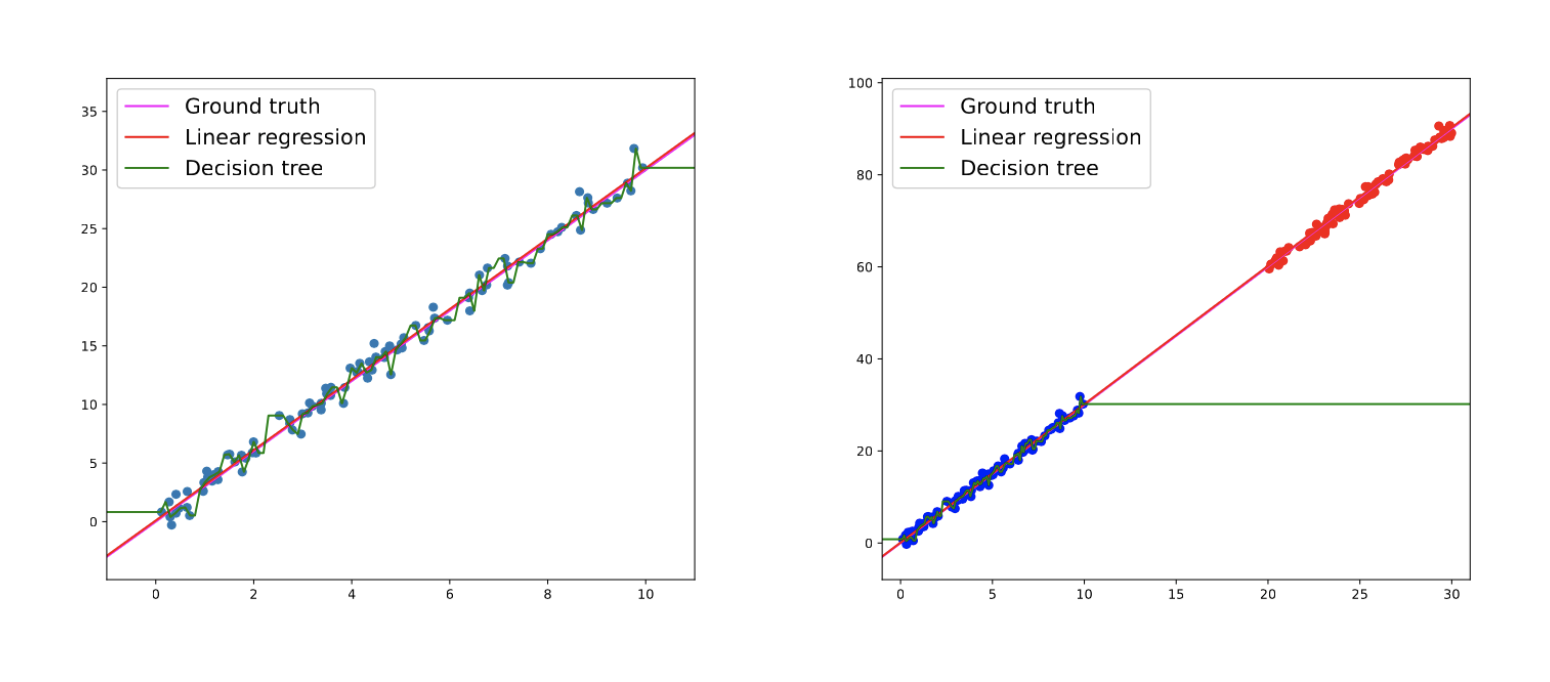